In [9]:
import os
import time
import numpy as np
import pandas as pd
import dask
import dask.dataframe as dd
import shutil
import dask.array as da
import dask_ml as dml
from sklearn.svm import SVC
from dask_ml.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import pickle
path=''

In [2]:
from dask.distributed import Client
client = Client(n_workers=3, processes=True)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 3
Total threads: 12,Total memory: 11.92 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:54237,Workers: 3
Dashboard: http://127.0.0.1:8787/status,Total threads: 12
Started: Just now,Total memory: 11.92 GiB
Comm: tcp://127.0.0.1:54254,Total threads: 4
Dashboard: http://127.0.0.1:54259/status,Memory: 3.97 GiB
Nanny: tcp://127.0.0.1:54240,


In [3]:
ddf = dd.read_csv(path)
ddf = ddf.drop(['Unnamed: 0','col31_integer','col33_integer','col35_integer'],axis=1)
ddf.head(5)

,time,col5_float,col7_float,col9_float,col11_float,col13_float,col15_float,col17_float,col19_float,col21_float,col23_float,col25_float,col27_float,target_boolean
0,1,0.360621,0.660183,0.950432,0.051235,0.283044,0.841807,0.142965,0.310050,0.791161,0.305067,0.761837,0.022378,0
1,2,0.959162,0.421440,0.617876,0.847244,0.522461,0.472585,0.156862,0.933377,0.324985,0.672343,0.658205,0.262042,0
2,3,0.328729,0.964067,0.306752,0.484405,0.328099,0.530360,0.804521,0.539465,0.130517,0.798976,0.639729,0.349704,0
3,4,0.132041,0.320748,0.362068,0.630939,0.239689,0.687089,0.826416,0.097794,0.140574,0.977748,0.927153,0.805324,0
4,5,0.205184,0.501917,0.490621,0.691092,0.423358,0.831099,0.940302,0.643222,0.641646,0.329250,0.767249,0.699260,0


In [4]:
train, test = dml.model_selection.train_test_split(ddf, random_state=0)
train.head(5)

d:\Principal\Workspace\Python\py3114\Lib\site-packages\dask_ml\model_selection\_split.py:462: FutureWarning: The default value for 'shuffle' must be specified when splitting DataFrames. In the future DataFrames will automatically be shuffled within blocks prior to splitting. Specify 'shuffle=True' to adopt the future behavior now, or 'shuffle=False' to retain the previous behavior.
  warnings.warn(


,time,col5_float,col7_float,col9_float,col11_float,col13_float,col15_float,col17_float,col19_float,col21_float,col23_float,col25_float,col27_float,target_boolean
0,1,0.360621,0.660183,0.950432,0.051235,0.283044,0.841807,0.142965,0.310050,0.791161,0.305067,0.761837,0.022378,0
2,3,0.328729,0.964067,0.306752,0.484405,0.328099,0.530360,0.804521,0.539465,0.130517,0.798976,0.639729,0.349704,0
3,4,0.132041,0.320748,0.362068,0.630939,0.239689,0.687089,0.826416,0.097794,0.140574,0.977748,0.927153,0.805324,0
4,5,0.205184,0.501917,0.490621,0.691092,0.423358,0.831099,0.940302,0.643222,0.641646,0.329250,0.767249,0.699260,0
5,6,0.894324,0.000631,0.314149,0.535473,0.784601,0.223983,0.789473,0.969188,0.187193,0.001361,0.802606,0.041459,0


In [5]:
train_x = train[['time', 'col5_float', 'col7_float','col9_float','col11_float','col13_float',
                'col15_float', 'col7_float', 'col19_float', 'col21_float', 
                'col23_float', 'col25_float', 'col27_float']]
train_y = train['target_boolean']
test_x = test[['time', 'col5_float', 'col7_float','col9_float','col11_float','col13_float',
                'col15_float', 'col7_float', 'col19_float', 'col21_float', 
                'col23_float', 'col25_float', 'col27_float']]
test_y = test['target_boolean']
train_x.head(5)

,time,col5_float,col7_float,col9_float,col11_float,col13_float,col15_float,col7_float,col19_float,col21_float,col23_float,col25_float,col27_float
0,1,0.360621,0.660183,0.950432,0.051235,0.283044,0.841807,0.660183,0.310050,0.791161,0.305067,0.761837,0.022378
2,3,0.328729,0.964067,0.306752,0.484405,0.328099,0.530360,0.964067,0.539465,0.130517,0.798976,0.639729,0.349704
3,4,0.132041,0.320748,0.362068,0.630939,0.239689,0.687089,0.320748,0.097794,0.140574,0.977748,0.927153,0.805324
4,5,0.205184,0.501917,0.490621,0.691092,0.423358,0.831099,0.501917,0.643222,0.641646,0.329250,0.767249,0.699260
5,6,0.894324,0.000631,0.314149,0.535473,0.784601,0.223983,0.000631,0.969188,0.187193,0.001361,0.802606,0.041459


In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report

In [7]:
import joblib
svc1 = SVC()
with joblib.parallel_backend('dask'):
    svc1.fit(train_x,train_y)

In [8]:
y_preds = svc1.predict(test_x)
accuracy = accuracy_score(test_y, y_preds)
print("Accuracy:", accuracy)

Accuracy: 0.6705426356589147


In [10]:
def ModelEval(model, mName, dataX, dataY):
    y_preds = model.predict(dataX)
    print('Model: ',mName)
    filename = mName+'.sav'
    pickle.dump(model, open(filename, 'wb'))
    #print('Model accuracy',accuracy_score(dataY, y_preds))
    
    print(classification_report(dataY, y_preds))

    cm = confusion_matrix(dataY, y_preds)
    TP = cm[0,0]
    TN = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    print('Confusion matrix\n\n', cm)
    print('\nTrue Positives(TP) = ', TP)
    print('\nTrue Negatives(TN) = ', TN)
    print('\nFalse Positives(FP) = ', FP)
    print('\nFalse Negatives(FN) = ', FN)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

In [ ]:
#svc1
ModelEval(svc1, 'svc1', test_x, test_y)

In [15]:
svc1 = SVC(C=0.001, kernel='poly')
with joblib.parallel_backend('dask'):
    svc1.fit(train_x,train_y)

In [16]:
params = {'C':[0.001,0.5,1,10],
          'kernel':['poly', 'rbf', 'sigmoid'],
          'gamma':['scale', 'auto'],
         }

grid_search = GridSearchCV(SVC(),params, cv=3, n_jobs=-1)
grid_search.fit(train_x,train_y)
grid_search
#svc2 = grid_search.best_estimator_

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.001, 0.5, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'rbf', 'sigmoid']})

In [18]:
svc2 = grid_search.best_estimator_
svc2

SVC(C=0.001, kernel='poly')

Model:  svc2


d:\Principal\Workspace\Python\py3114\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Principal\Workspace\Python\py3114\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Principal\Workspace\Python\py3114\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.67      1.00      0.80       173
           1       0.00      0.00      0.00        85

    accuracy                           0.67       258
   macro avg       0.34      0.50      0.40       258
weighted avg       0.45      0.67      0.54       258

Confusion matrix

 [[173   0]
 [ 85   0]]

True Positives(TP) =  173

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  85


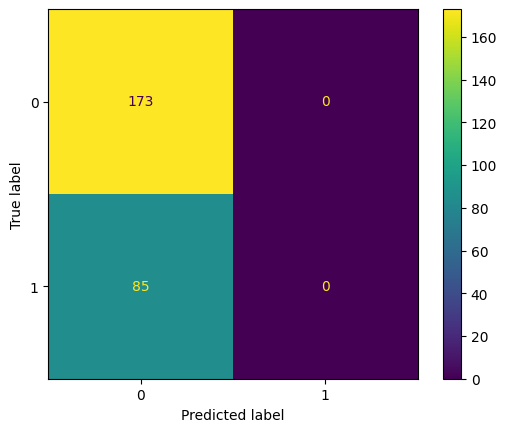

In [19]:
ModelEval(svc2, 'svc2', test_x, test_y)